In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sid321axn/malicious-urls-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'malicious-urls-dataset' dataset.
Path to dataset files: /kaggle/input/malicious-urls-dataset


In [ ]:
import shutil
shutil.move("/content/1/malicious_phish.csv","/content/")

Error: Destination path '/content/malicious_phish.csv' already exists

In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
df=pd.read_csv("malicious_phish.csv")

In [ ]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [ ]:
df['type'].value_counts()

,count
type,
benign,428103
defacement,96457
phishing,94111
malware,32520


In [ ]:
from wordcloud import WordCloud

In [ ]:
df_benign=df[df['type']=='benign']
df_defacement=df[df['type']=='defacement']
df_phishing=df[df['type']=='phishing']
df_malware=df[df['type']=='malware']

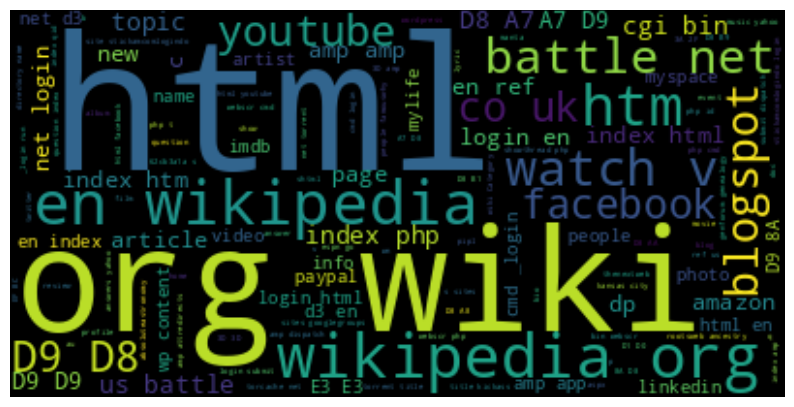

In [ ]:
url=" ".join(i for i in df_benign['url'])
wordcloud=WordCloud().generate(url)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

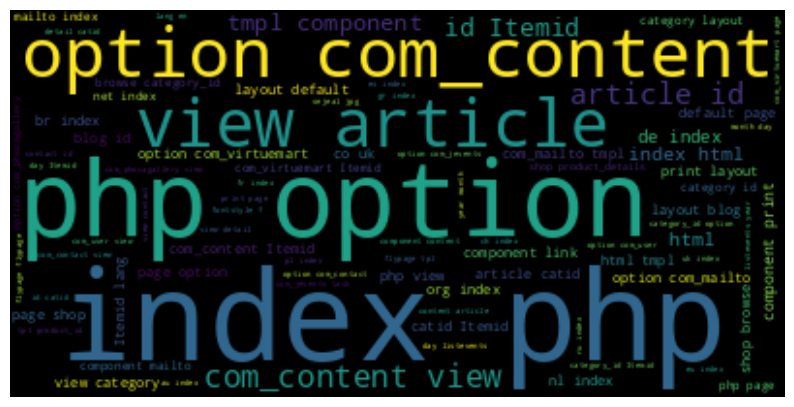

In [ ]:
url=" ".join(i for i in df_defacement['url'])
wordcloud=WordCloud().generate(url)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

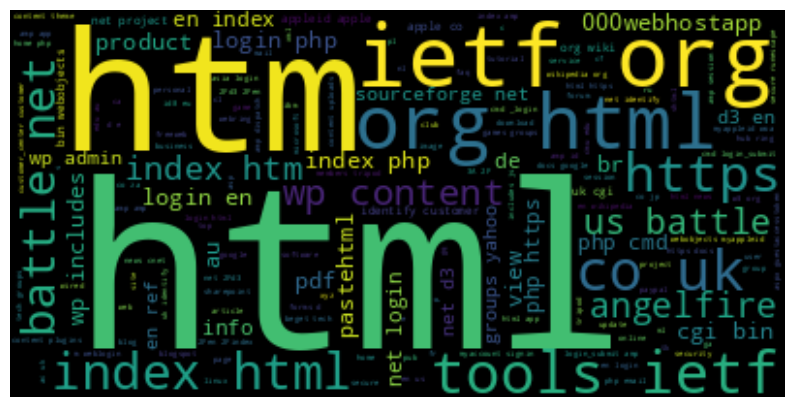

In [ ]:
url=" ".join(i for i in df_phishing['url'])
wordcloud=WordCloud().generate(url)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

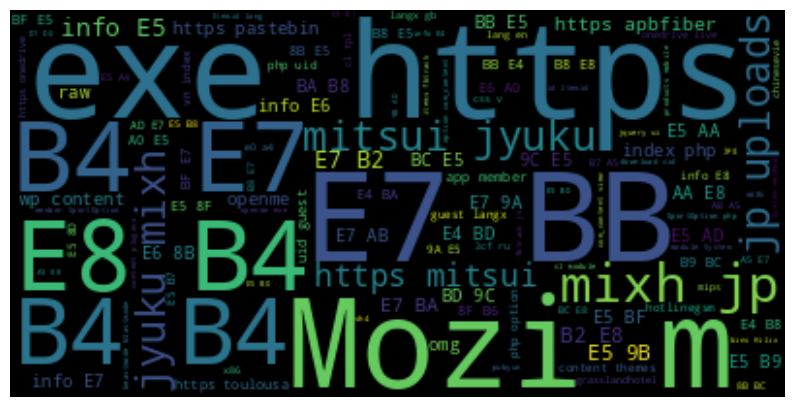

In [ ]:
url=" ".join(i for i in df_malware['url'])
wordcloud=WordCloud().generate(url)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import re

def find_ip(url):
    ipv6 = r'\b(?:[0-9a-fA-F]{1,4}:){7}[0-9a-fA-F]{1,4}\b'
    ipv4 = r'\b(?:(?:25[0-5]|2[0-4]\d|1\d{2}|[1-9]?\d)\.){3}' \
           r'(?:25[0-5]|2[0-4]\d|1\d{2}|[1-9]?\d)\b'
    ipv4_hex = r'\b(?:0x[0-9a-fA-F]{1,2}\.){3}0x[0-9a-fA-F]{1,2}\b'


    if re.search(ipv6, url) or re.search(ipv4, url) or re.search(ipv4_hex, url):
        return 1
    else:
        return 0
df['ip']=df['url'].apply(lambda i:find_ip(i))

In [ ]:
def count_dot(url):
    return url.count('.')
df['count.']=df['url'].apply(lambda i:count_dot(i))

In [ ]:
def url_len(url):
  return len(url)
df['length']=df['url'].apply(lambda i:url_len(i))

In [ ]:
def has_https(url):
    return int(url.startswith('https://'))
df['has_https'] = df['url'].apply(has_https)

In [ ]:
from urllib.parse import urlparse
def count_subdomains(url):
    hostname = urlparse(url).hostname
    if hostname:
        return hostname.count('.')
    return 0
df['subdomain_count'] = df['url'].apply(count_subdomains)

In [ ]:
def count_url_params(url):
    parsed = urlparse(url)
    if parsed.query:
        return parsed.query.count('&') + 1
    return 0
df['param_count'] = df['url'].apply(count_url_params)

In [ ]:
def count_www(url):
    return url.count('www')

df['www'] = df['url'].apply(count_www)

In [ ]:
def count_atrate(url):
    return url.count('@')

df['@'] = df['url'].apply(count_atrate)

In [ ]:
def count_percentage(url):
    return url.count('%')

df['%'] = df['url'].apply(count_percentage)

In [ ]:
def count_asterisk(url):
    return url.count('*')

df['*'] = df['url'].apply(count_asterisk)

In [ ]:
def count_dollar(url):
    return url.count('$')

df['$'] = df['url'].apply(count_dollar)

In [ ]:
def count_hash(url):
    return url.count('#')

df['#'] = df['url'].apply(count_hash)

In [ ]:
def count_equalto(url):
    return url.count('=')

df['='] = df['url'].apply(count_equalto)

In [ ]:
def hostname_length(url):
    return len(urlparse(url).netloc)

df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))

df.head()




,url,type,ip,count.,length,has_https,subdomain_count,param_count,www,@,%,*,$,#,=,hostname_length
0,br-icloud.com.br,phishing,0,2,16,0,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,2,35,0,0,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,2,31,0,0,0,0,0,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,3,88,0,2,4,1,0,0,0,0,0,4,21
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,2,235,0,1,3,0,0,0,0,0,0,3,23


In [ ]:
from urllib.parse import urlparse

def hostname_length2(url):
    try:
        if not url.startswith(('http://', 'https://')):
            url = 'http://' + url
        return len(urlparse(url).netloc)
    except ValueError:
        # Return 0 or np.nan if URL is invalid
        return 0

df['hostname_length_2'] = df['url'].apply(hostname_length2)

df.head()


,url,type,ip,count.,length,has_https,subdomain_count,param_count,www,@,%,*,$,#,=,hostname_length,hostname_length_2
0,br-icloud.com.br,phishing,0,2,16,0,0,0,0,0,0,0,0,0,0,0,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,2,35,0,0,0,0,0,0,0,0,0,0,0,11
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,2,31,0,0,0,0,0,0,0,0,0,0,0,14
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,3,88,0,2,4,1,0,0,0,0,0,4,21,21
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,2,235,0,1,3,0,0,0,0,0,0,3,23,23


In [ ]:

def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))

In [ ]:

df.head()

,url,type,ip,count.,length,has_https,subdomain_count,param_count,www,@,%,*,$,#,=,hostname_length,hostname_length_2,sus_url
0,br-icloud.com.br,phishing,0,2,16,0,0,0,0,0,0,0,0,0,0,0,16,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,2,35,0,0,0,0,0,0,0,0,0,0,0,11,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,2,31,0,0,0,0,0,0,0,0,0,0,0,14,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,3,88,0,2,4,1,0,0,0,0,0,4,21,21,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,2,235,0,1,3,0,0,0,0,0,0,3,23,23,0


In [ ]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))



In [ ]:
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))



In [ ]:

def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0


df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1888995204.py:2: SyntaxWarning: invalid escape sequence '\.'
  match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
/tmp/ipytho

In [ ]:

def http(url):
    if url.startswith('http://'):
        return 1
    else:
        return 0


df['short_url'] = df['url'].apply(http)

In [ ]:
df

,url,type,ip,count.,length,has_https,subdomain_count,param_count,www,@,...,*,$,#,=,hostname_length,hostname_length_2,sus_url,count_dir,count_embed_domian,short_url
0,br-icloud.com.br,phishing,0,2,16,0,0,0,0,0,...,0,0,0,0,0,16,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,2,35,0,0,0,0,0,...,0,0,0,0,0,11,0,2,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,2,31,0,0,0,0,0,...,0,0,0,0,0,14,0,3,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,3,88,0,2,4,1,0,...,0,0,0,4,21,21,0,1,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,2,235,0,1,3,0,0,...,0,0,0,3,23,23,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0,3,39,0,0,0,0,0,...,0,0,0,0,0,15,0,3,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,2,44,0,0,0,0,0,...,0,0,0,0,0,18,0,4,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0,2,42,0,0,0,1,0,...,0,0,0,0,0,16,0,4,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,2,45,0,0,0,0,0,...,0,0,0,0,0,16,0,2,0,0


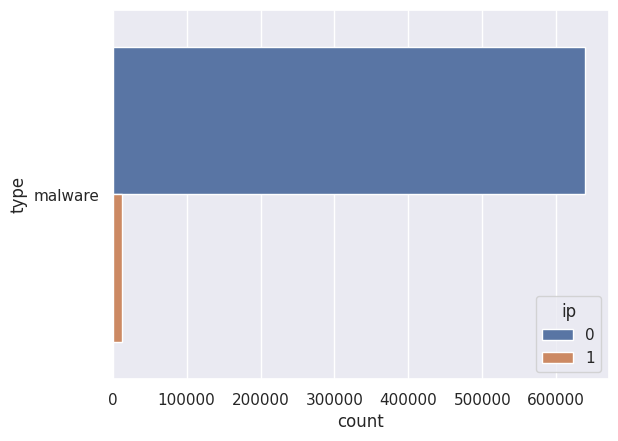

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="ip")

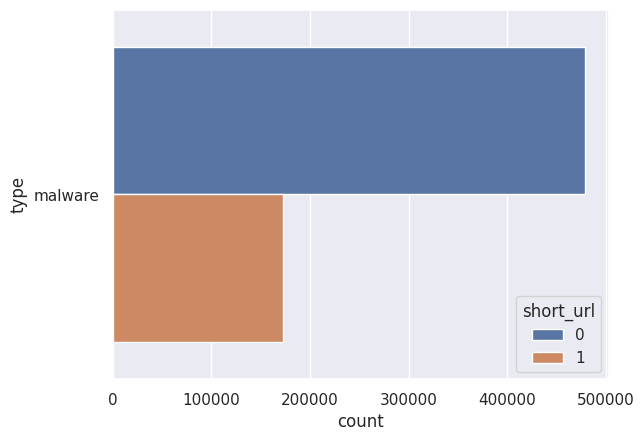

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="short_url")

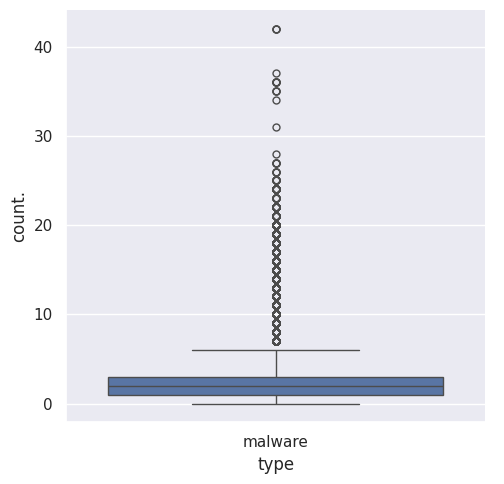

In [ ]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count.", kind="box", data=df)

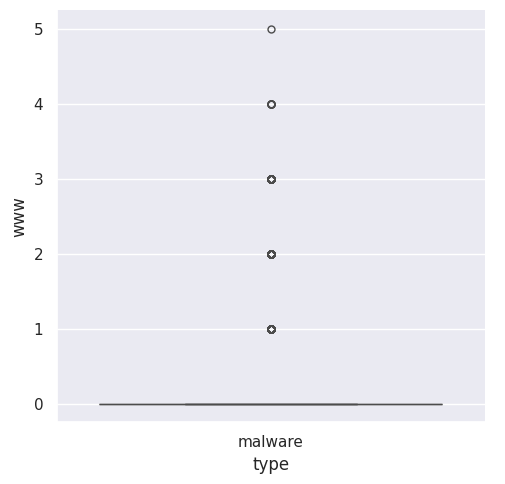

In [ ]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="www", kind="box", data=df)

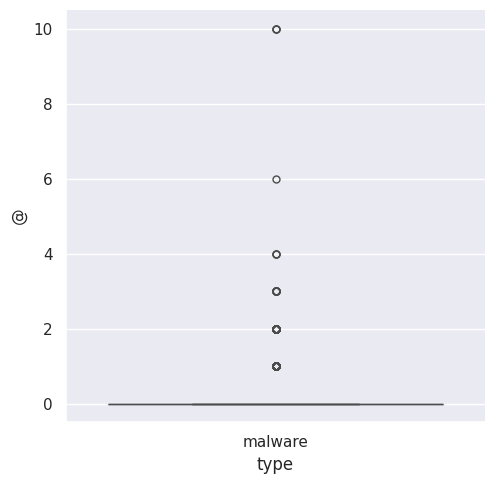

In [ ]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="@", kind="box", data=df)

In [ ]:
df_3=df

In [ ]:
df_3

,url,type,ip,count.,length,has_https,subdomain_count,param_count,www,@,...,*,$,#,=,hostname_length,hostname_length_2,sus_url,count_dir,count_embed_domian,short_url
0,br-icloud.com.br,phishing,0,2,16,0,0,0,0,0,...,0,0,0,0,0,16,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,2,35,0,0,0,0,0,...,0,0,0,0,0,11,0,2,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,2,31,0,0,0,0,0,...,0,0,0,0,0,14,0,3,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,3,88,0,2,4,1,0,...,0,0,0,4,21,21,0,1,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,2,235,0,1,3,0,0,...,0,0,0,3,23,23,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0,3,39,0,0,0,0,0,...,0,0,0,0,0,15,0,3,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,2,44,0,0,0,0,0,...,0,0,0,0,0,18,0,4,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0,2,42,0,0,0,1,0,...,0,0,0,0,0,16,0,4,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,2,45,0,0,0,0,0,...,0,0,0,0,0,16,0,2,0,0


DATASET PREPARATION- BINARY CLASSIFICATION


In [ ]:
df_2=df

In [ ]:
df

,url,type,ip,count.,length,has_https,subdomain_count,param_count,www,@,...,*,$,#,=,hostname_length,hostname_length_2,sus_url,count_dir,count_embed_domian,short_url
0,br-icloud.com.br,phishing,0,2,16,0,0,0,0,0,...,0,0,0,0,0,16,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,2,35,0,0,0,0,0,...,0,0,0,0,0,11,0,2,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,2,31,0,0,0,0,0,...,0,0,0,0,0,14,0,3,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,3,88,0,2,4,1,0,...,0,0,0,4,21,21,0,1,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,2,235,0,1,3,0,0,...,0,0,0,3,23,23,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0,3,39,0,0,0,0,0,...,0,0,0,0,0,15,0,3,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,2,44,0,0,0,0,0,...,0,0,0,0,0,18,0,4,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0,2,42,0,0,0,1,0,...,0,0,0,0,0,16,0,4,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,2,45,0,0,0,0,0,...,0,0,0,0,0,16,0,2,0,0


In [ ]:
def renaming(type):
  if type=='benign':
    return 1 #1=safe 0=unsafe
  else:
    return 0
df_2['type']=df_2['type'].apply(renaming)

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   url                 651191 non-null  object
 1   type                651191 non-null  int64 
 2   ip                  651191 non-null  int64 
 3   count.              651191 non-null  int64 
 4   length              651191 non-null  int64 
 5   has_https           651191 non-null  int64 
 6   subdomain_count     651191 non-null  int64 
 7   param_count         651191 non-null  int64 
 8   www                 651191 non-null  int64 
 9   @                   651191 non-null  int64 
 10  %                   651191 non-null  int64 
 11  *                   651191 non-null  int64 
 12  $                   651191 non-null  int64 
 13  #                   651191 non-null  int64 
 14  =                   651191 non-null  int64 
 15  hostname_length     651191 non-null  int64 
 16  ho

In [ ]:
df_2['type'].value_counts()

,count
type,
1,428103
0,223088


In [ ]:
df_2 = df_2.drop(['url'], axis=1)

In [ ]:
x=df_2.drop(['type'],axis=1)
y=df_2['type']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)

Random Forest


In [ ]:
from math import sqrt
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(class_weight="balanced",max_features='sqrt',n_estimators=100)
rf.fit(x_train,y_train)
y_predict_rf=rf.predict(x_test)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_rf))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     44618
           1       0.97      0.98      0.98     85621

    accuracy                           0.97    130239
   macro avg       0.96      0.96      0.96    130239
weighted avg       0.97      0.97      0.97    130239



In [ ]:
from sklearn import metrics

In [ ]:
score=metrics.accuracy_score(y_test,y_predict_rf)
print("accuracy",score)

accuracy 0.9676210658865624


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict_rf)
cm_df_2=pd.DataFrame(cm,index=['benign','malware'],columns=[1,0])

<Axes: >

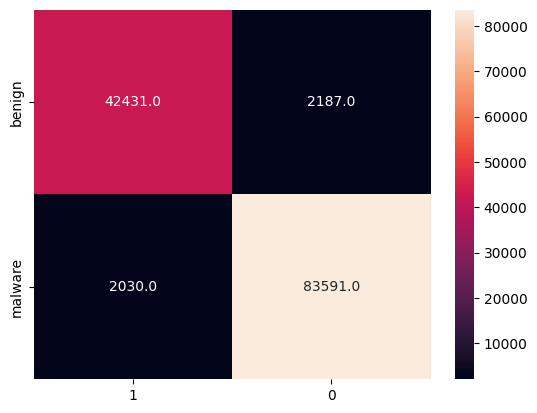

In [ ]:
sns.heatmap(cm_df_2,annot=True,fmt=".1f")

<Axes: >

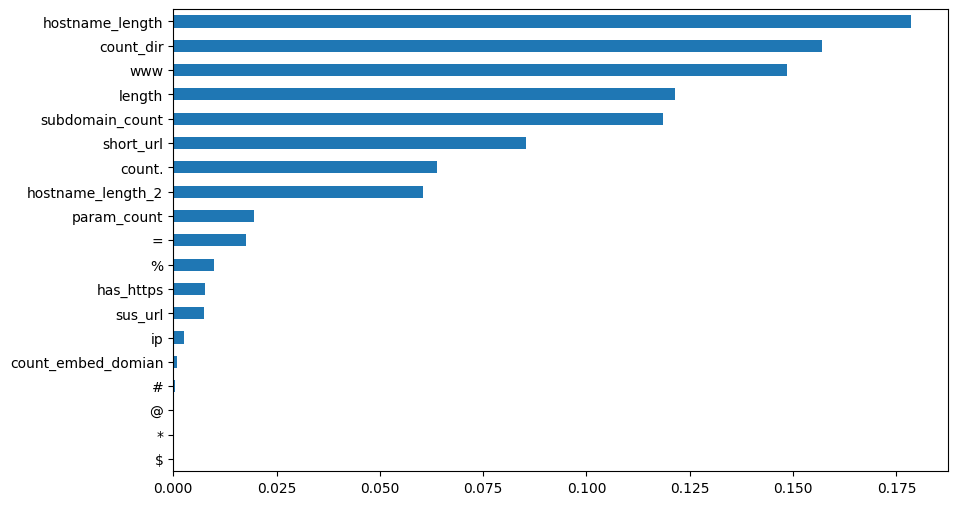

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))

In [ ]:
import pickle
filename = 'binary_rf'
pickle.dump(rf, open(filename, 'wb'))

In [ ]:
import lightgbm
from lightgbm import LGBMClassifier

In [ ]:
lgbm = LGBMClassifier(
    objective='binary',
    is_unbalance=True,
    boosting_type='gbdt',
    feature_fraction=0.5,
    learning_rate=0.01,
    bagging_fraction=0.7,
    bagging_freq=5,
    n_estimators=5000,
    stopping_rounds=100,
    verbose=100
)

In [ ]:
lgb=lgbm.fit(x_train,y_train,eval_set=[(x_test,y_test)],)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Re-bagging, using 365116 data to train
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 14
[LightGBM] [Debug] Re-bagging, using 364501 data to train
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 17
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 14
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 12
[LightGBM] [Debug] Re-bagging, using 3645

In [ ]:
lgm_predict=lgbm.predict(x_test)

[LightGBM] [Warning] Unknown parameter: stopping_rounds
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [ ]:
print(classification_report(y_test,lgm_predict))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     44618
           1       0.97      0.98      0.98     85621

    accuracy                           0.97    130239
   macro avg       0.97      0.96      0.96    130239
weighted avg       0.97      0.97      0.97    130239



In [ ]:
score=metrics.accuracy_score(y_test,lgm_predict)
print("accuracy",score)

accuracy 0.9676287440781947


In [ ]:
import pickle
filename = 'binary_lgm.pkl'
pickle.dump(lgbm, open(filename, 'wb'))

In [ ]:
import pickle
filename = 'lgbm_binary.pkl'
pickle.dump(lgbm, open(filename, 'wb'))

In [ ]:
import xgboost as xgb
from xgboost import  XGBClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters = {
    'n_estimators': [ 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0.5, 1, 1.5],
}

In [ ]:
xgb_model = xgb.XGBClassifier(scale_pos_weight=2)



random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=parameters,
    n_iter=50,
    scoring='f1',        # optimize for recall
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


In [ ]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [200, 300, 400],
                                        'reg_alpha': [0, 0.1, 1],
                                        'reg_lambda': [0.5, 1, 1.5],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='f1', verbose=2)

In [ ]:
print("Best Recall Score:", random_search.best_score_)
print("Best Parameters:", random_search.best_params_)

best_model = random_search.best_estimator_

Best Recall Score: 0.9767458292338198
Best Parameters: {'subsample': 0.6, 'reg_lambda': 1.5, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0}


In [ ]:
best_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
best_pred = best_model.predict(x_test)
print(classification_report(y_test,best_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95     44618
           1       0.96      0.99      0.98     85621

    accuracy                           0.97    130239
   macro avg       0.97      0.96      0.97    130239
weighted avg       0.97      0.97      0.97    130239



In [ ]:
xgb_model.fit(x_train,y_train)

In [ ]:
xgb_pred = xgb_model.predict(x_test)
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     44618
           1       0.97      0.99      0.98     85621

    accuracy                           0.97    130239
   macro avg       0.97      0.96      0.96    130239
weighted avg       0.97      0.97      0.97    130239



In [ ]:
import pickle
filename = 'binary_xgb'
pickle.dump(xgb_model, open(filename, 'wb'))

multiclassification


In [ ]:
df_final_3=df

In [ ]:
df_final_4 = df.copy()  # Start fresh
df_final_4 = df_final_4[df_final_4['type'].isin(['malware', 'defacement', 'phishing'])]


In [ ]:
df_m=df_m.drop(['url'],axis=1)

In [ ]:
final_df=final_df.drop_duplicates(inplace=True)

In [ ]:

df_final_3

,url,type,ip,count.,length,has_https,subdomain_count,param_count,www,@,...,*,$,#,=,hostname_length,hostname_length_2,sus_url,count_dir,count_embed_domian,short_url
0,br-icloud.com.br,phishing,0,2,16,0,0,0,0,0,...,0,0,0,0,0,16,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,2,35,0,0,0,0,0,...,0,0,0,0,0,11,0,2,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,2,31,0,0,0,0,0,...,0,0,0,0,0,14,0,3,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,3,88,0,2,4,1,0,...,0,0,0,4,21,21,0,1,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,2,235,0,1,3,0,0,...,0,0,0,3,23,23,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0,3,39,0,0,0,0,0,...,0,0,0,0,0,15,0,3,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,2,44,0,0,0,0,0,...,0,0,0,0,0,18,0,4,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0,2,42,0,0,0,1,0,...,0,0,0,0,0,16,0,4,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,2,45,0,0,0,0,0,...,0,0,0,0,0,16,0,2,0,0


In [ ]:
df_final_3=df_final_3.drop(['url'],axis=1)

In [ ]:
df_b=df[df['type']=='benign']
df_m=df[df['type']=='malware']
df_d=df[df['type']=='defacement']
df_p=df[df['type']=='phishing']

In [ ]:
df=pd.concat([df_m,df_d,df_p])

In [ ]:
def rename(type):
  if type=='defacement':
    return 0
  elif type=='malware':
    return 1
  elif type=='phishing':
    return 2
  else:
    return 3
df['type']=df['type'].apply(rename)

In [ ]:
df

,type,ip,count.,length,has_https,subdomain_count,param_count,www,@,%,*,$,#,=,hostname_length,hostname_length_2,sus_url,count_dir,count_embed_domian,short_url
38,1,0,3,67,0,2,2,1,0,0,0,0,0,2,14,14,0,3,0,1
115,1,0,1,81,0,1,0,0,0,21,0,0,0,0,9,9,0,2,0,1
156,1,0,1,63,0,1,0,0,0,15,0,0,0,0,9,9,0,2,0,1
212,1,0,1,99,0,1,0,0,0,27,0,0,0,0,9,9,0,2,0,1
240,1,0,2,81,0,1,8,0,0,0,0,0,0,8,13,13,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,2,0,3,39,0,0,0,0,0,0,0,0,0,0,0,15,0,3,0,0
651187,2,0,2,44,0,0,0,0,0,0,0,0,0,0,0,18,0,4,0,0
651188,2,0,2,42,0,0,0,1,0,0,0,0,0,0,0,16,0,4,0,0
651189,2,0,2,45,0,0,0,0,0,0,0,0,0,0,0,16,0,2,0,0


In [ ]:
x=df.drop(['type'],axis=1)
y=df['type']

x_train,x_test,y_train,y_test =  train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)

In [ ]:
xgb_model = xgb.XGBClassifier(n_estimators= 100,val_metric='auc',class_weight='balanced',objective='multi:softprob')
xgb_model.fit(x_train,y_train)





/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:19:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "class_weight", "val_metric" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, ...)

In [ ]:
xgb_pred = xgb_model.predict(x_test)
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     19292
           1       0.97      0.88      0.92      6504
           2       0.97      0.95      0.96     18822

    accuracy                           0.96     44618
   macro avg       0.96      0.94      0.95     44618
weighted avg       0.96      0.96      0.96     44618



<Axes: >

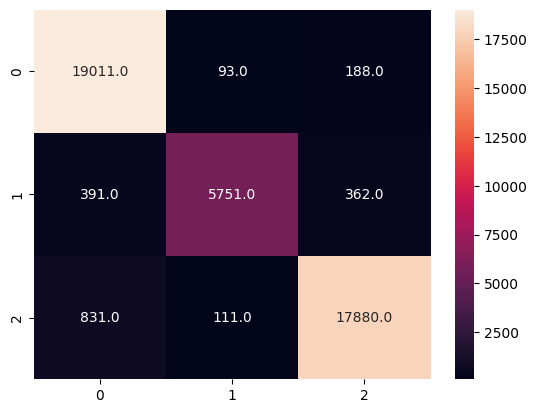

In [ ]:
cm=confusion_matrix(y_test,xgb_pred)
sns.heatmap(cm,annot=True,fmt=".1f")

In [ ]:
import pickle
filename=('multi_xgb')
pickle.dump(xgb_model, open(filename, 'wb'))

In [ ]:
import pickle
filename=('multi_xgb.pkl')
loaded_model2=pickle.load(open(filename, 'rb'))

In [ ]:
import pickle
filename=('binary_rf.pkl')
loaded_model=pickle.load(open(filename, 'rb'))

In [ ]:
sample="https://github.com"


In [ ]:
def preprocess(url):
  df=pd.DataFrame([url],columns=['url'])
  df['url']=url

  df['ip']=df['url'].apply(lambda i:find_ip(i))

  df['count.']=df['url'].apply(lambda i:count_dot(i))

  df['length']=df['url'].apply(lambda i:url_len(i))

  df['has_https'] = df['url'].apply(has_https)

  df['subdomain_count'] = df['url'].apply(count_subdomains)

  df['param_count'] = df['url'].apply(count_url_params)


  df['www'] = df['url'].apply(count_www)


  df['@'] = df['url'].apply(count_atrate)


  df['%'] = df['url'].apply(count_percentage)


  df['*'] = df['url'].apply(count_asterisk)


  df['$'] = df['url'].apply(count_dollar)


  df['#'] = df['url'].apply(count_hash)


  df['='] = df['url'].apply(count_equalto)

  df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))

  df['hostname_length_2'] = df['url'].apply(hostname_length2)

  df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))


  df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))



  df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))


  df['short_url'] = df['url'].apply(http)

  df=df.drop(['url'],axis=1)
  return df

In [ ]:
processed_url=preprocess("https://google.com")

In [ ]:
phishing_url=preprocess("animecons.com/guests/bio.shtml/95/Johnny_Yong_Bosch")

In [ ]:
x_train.columns

Index(['ip', 'count.', 'length', 'has_https', 'subdomain_count', 'param_count',
       'www', '@', '%', '*', '$', '#', '=', 'hostname_length',
       'hostname_length_2', 'sus_url', 'count_dir', 'count_embed_domian',
       'short_url'],
      dtype='object')

In [ ]:
phishing_url.columns

Index(['ip', 'count.', 'length', 'has_https', 'subdomain_count', 'param_count',
       'www', '@', '%', '*', '$', '#', '=', 'hostname_length',
       'hostname_length_2', 'sus_url', 'count_dir', 'count_embed_domian',
       'short_url'],
      dtype='object')

In [ ]:
processed_url.columns

Index(['ip', 'count.', 'length', 'has_https', 'subdomain_count', 'param_count',
       'www', '@', '%', '*', '$', '#', '=', 'hostname_length',
       'hostname_length_2', 'sus_url', 'count_dir', 'count_embed_domian',
       'short_url'],
      dtype='object')

In [ ]:
def prediction(url):
  final_url=preprocess(url)

  result=loaded_model.predict(final_url)
  if result[0]==1:
    print("malicious")
    result=loaded_model.predict(final_url)
    if result[0]==1:
      print("malware")
    elif result[0]==2:
      print("defacement")
    else:
      print("phishing")
  else:
    print("safe")
  print(result)

In [ ]:
url=("animecons.com/guests/bio.shtml/95/Johnny_Yong_Bosch")

In [ ]:
prediction(url)

malicious
malware
[1]


In [ ]:

.sample.shape

AttributeError: 'str' object has no attribute 'shape'

In [ ]:
phishing_url.shape

(1, 19)

In [ ]:
prediction(processed_url)

ValueError: Must pass 2-d input. shape=(1, 1, 19)

In [ ]:
df.loc[467647].url

'animecons.com/guests/bio.shtml/95/Johnny_Yong_Bosch'